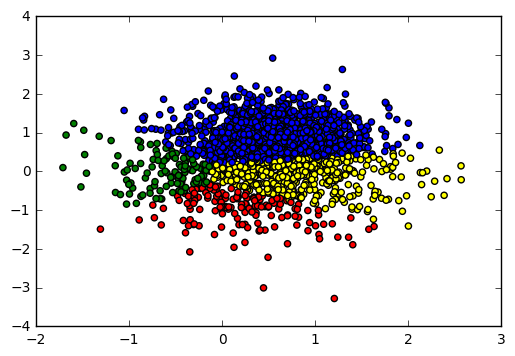

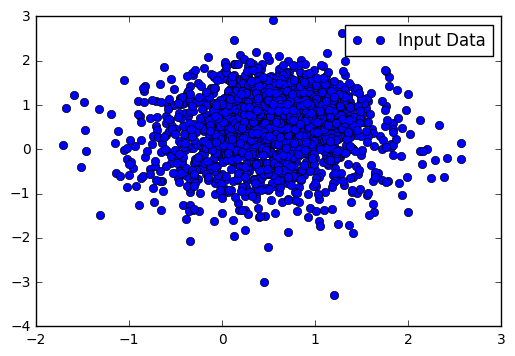

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


def display_partition(x_values,y_values,assignment_values):
    labels = []
    colors = ["red","blue","green","yellow"]
    for i in range(len(assignment_values)):
      labels.append(colors[(assignment_values[i])])
    color = labels
    df = pd.DataFrame\
            (dict(x =x_values,y = y_values ,color = labels ))
    fig, ax = plt.subplots()
    ax.scatter(df['x'], df['y'], c=df['color'])
    plt.show()


num_vectors = 2000
num_clusters = 4
n_samples_per_cluster = 500

num_steps = 1000
x_values = []
y_values = []
vector_values = []

#CREATE RANDOM DATA
for i in range(num_vectors):
  if np.random.random() > 0.5:
    x_values.append(np.random.normal(0.4, 0.7))
    y_values.append(np.random.normal(0.2, 0.8))
    
  else:
    x_values.append(np.random.normal(0.6, 0.4))
    y_values.append(np.random.normal(0.8, 0.5))
vector_values = list(zip(x_values,y_values))

vectors = tf.constant(vector_values)

n_samples = tf.shape(vector_values)[0]

random_indices = tf.random_shuffle(tf.range(0, n_samples))
begin = [0,]
size = [num_clusters,]
size[0] = num_clusters
centroid_indices = tf.slice(random_indices, begin, size)
centroids = tf.Variable(tf.gather(vector_values, centroid_indices))
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

vectors_subtration = tf.sub(expanded_vectors,expanded_centroids)
euclidean_distances = tf.reduce_sum(tf.square(vectors_subtration), 2)

assignments = tf.to_int32(tf.argmin(euclidean_distances, 0))

partitions = [0, 0, 1, 1, 0]
num_partitions = 2
data = [10, 20, 30, 40, 50]
outputs = []
outputs.append([10, 20, 50])
outputs.append([30, 40])
partitions = tf.dynamic_partition(vectors, assignments, num_clusters)

update_centroids = tf.concat(0, \
                             [tf.expand_dims\
                              (tf.reduce_mean(partition, 0), 0)\
                              for partition in partitions])


init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)
for step in range(num_steps):
   _, centroid_values, assignment_values =\
      sess.run([update_centroids,\
                centroids,\
                assignments])


display_partition(x_values,y_values,assignment_values)

plt.plot(x_values,y_values, 'o', label='Input Data')
plt.legend()
plt.show()